Stock Market Analysis Using Python

Business Scenario: Data Science extracts meaningful insight from chunks of raw data, which is
useful to different business segments for planning their future course of action. Finance is
probably one of the first to catch on to this trend with a rise in the penetration of analytics into
many aspects of our lives. Here, we will analyze data from the stock market for some technology
stocks such as Apple, Google, Amazon, and Microsoft.

Objective: Use Python libraries such as Pandas, Seaborn, and Matplotlib to extract and analyze
the information, visualize it, and look at different ways to analyze the risk of a stock, based on its
performance history.

About the Data: The stocks we have chosen are from various industries and market caps namely,
• Apple
• Google
• Microsoft
• Amazon
For the start, we shall investigate the Amazon stock individually and then move on to the
combined analysis.
To know more about stocks and their data please visit the below link:
https://in.finance.yahoo.com/

In [4]:
import yfinance as yf

• Read the Data from Yahoo finance website directly.

In [5]:
# Download data for Amazon
amazon_data = yf.download('AMZN', start='2020-01-01', end='2024-01-01')

C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


• Perform cleaning.

1.Check for Missing Values:

In [7]:
missing_values = amazon_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


2.Ensure Correct Data Format:

In [12]:
import pandas as pd

In [10]:
amazon_data_cleaned = amazon_data.dropna()

In [15]:
#Check data types of all columns
print("Data Types:")
print(amazon_data_cleaned.dtypes)

Data Types:
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


3.Change in Stock Price Over Time:

In [17]:
#You can plot the closing price of the stock over time to visualize the change.
#Use Matplotlib or Seaborn for plotting.

import matplotlib.pyplot as plt

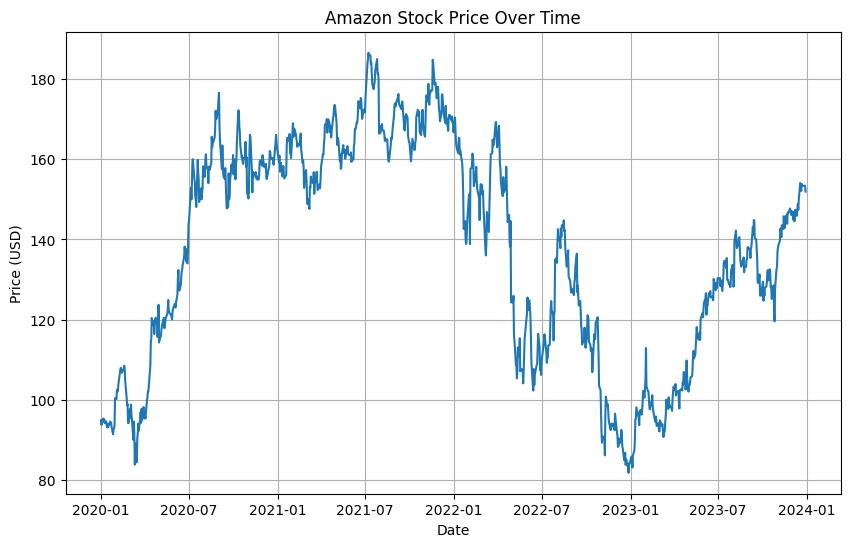

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(amazon_data['Close'])
plt.title('Amazon Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

4.Visualize Change in Stock’s Volume Being Traded Over Time:

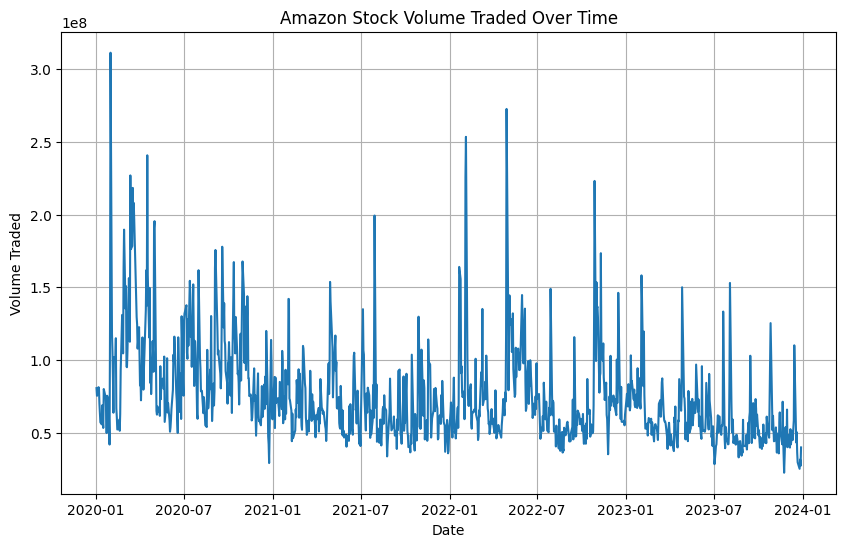

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(amazon_data['Volume'])
plt.title('Amazon Stock Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.grid(True)
plt.show()

5.Moving Average of Various Stocks:
Calculate the moving average of the stock's closing price over a specified period.

In [20]:
# Calculate 50-day moving average
amazon_data['MA_50'] = amazon_data['Close'].rolling(window=50).mean()

6.Daily Return Average of a Stock:
Calculate the daily returns of the stock.

In [21]:
# Calculate daily returns
amazon_data['Daily_Return'] = amazon_data['Close'].pct_change()

7.Add a New Column ‘Trend’ Whose Values are Based on the 'Daily Return':
Based on the daily return, you can define the trend as 'Up', 'Down', or 'Stable'.

In [23]:
amazon_data['Trend'] = 'Stable'
amazon_data.loc[amazon_data['Daily_Return'] > 0, 'Trend'] = 'Up'
amazon_data.loc[amazon_data['Daily_Return'] < 0, 'Trend'] = 'Down'


8. Visualize Trend Frequency Through a Pie Chart:
Plot a pie chart to visualize the frequency of each trend.

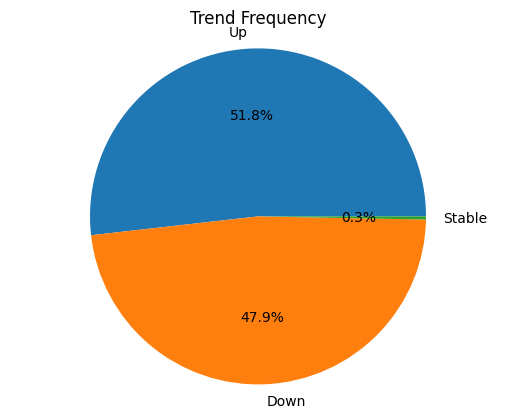

In [24]:
trend_counts = amazon_data['Trend'].value_counts()
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%')
plt.title('Trend Frequency')
plt.axis('equal')
plt.show()

9. Correlation Between the Daily Returns of Different Stocks:
Calculate the correlation between the daily returns of the selected stocks.

In [25]:
# Download data for other stocks (Google, Microsoft, Apple)
other_stocks = yf.download(['GOOGL', 'MSFT', 'AAPL'], start='2020-01-01', end='2024-01-01')

C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  3 of 3 

In [26]:
# Concatenate daily returns of all stocks
all_daily_returns = pd.concat([amazon_data['Daily_Return'], other_stocks['Close'].pct_change()], axis=1)


In [27]:
all_daily_returns

,Daily_Return,AAPL,GOOGL,MSFT
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.012139,-0.009722,-0.005231,-0.012452
2020-01-06,0.014886,0.007968,0.026654,0.002585
2020-01-07,0.002092,-0.004703,-0.001932,-0.009118
2020-01-08,-0.007809,0.016086,0.007118,0.015928
...,...,...,...,...
2023-12-22,-0.002730,-0.005547,0.007620,0.002784
2023-12-26,-0.000065,-0.002841,0.000212,0.000214
2023-12-27,-0.000456,0.000518,-0.008126,-0.001575
